This script is written to plot household TV ownership rates from approximately 1950 to the present day, and then fit this data with a user-defined fit function.

We begin by importing the necessary libraries from ROOT, as well as some python math libraries.

We also define a canvas that will be used for displaying the results.

In [1]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1
from ROOT import gStyle
from array import array
import math
import random

random.seed(1)

c1 = TCanvas( 'c1', 'The Fit Canvas', 200, 10, 700, 500 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c2 = TCanvas( 'c2', 'The Derivative Canvas', 200, 10, 700, 500 )
c2.SetGridx()
c2.SetGridy()
c2.GetFrame().SetFillColor( 21 )
c2.GetFrame().SetBorderMode(-1 )
c2.GetFrame().SetBorderSize( 5 )
#c1.SetLogy()

Welcome to JupyROOT 6.18/00


Define a user function for fitting the data.

In [2]:
def fitfunction(x,par):
    #return par[0]/2.0*(1.0+math.tanh((x[0]-par[2])/par[1]))
    return par[0]*(1.0-math.exp(-1.0*par[1]*(x[0]-par[2])))

def fitfunction_python(x,par):
    #return par[0]/2.0*(1.0+math.tanh((x[0]-par[2])/par[1]))
    return par[0]*(1.0-math.exp(-1.0*par[1]*(x-par[2])))

def derivativefunction_python(x,par):
    return par[0]*par[1]*math.exp(-1.0*par[1]*(x-par[2]))

Define python arrays to store the data.

In [3]:
xx = array('d')
yy = array('d')

Read data from the filem and store in the above python arrays.

In [4]:
npoints = 0
noise_level = 0.0
with open('tv_rate.dat') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        xx.append(float(data[0]))
        yy.append(float(data[1])-noise_level+2.0*noise_level*random.random())
    

In [5]:
gStyle.SetOptFit(1)

Define a ROOT fitting object, based upon the above function.  Set initial parameter values and names.

In [6]:
pfit1 = TF1("pfit1",fitfunction,1949,2013,3)
pfit1.SetParameters(98.0,0.2,1954.0)
pfit1.SetParNames("Amplitude","Decay Rate","Start Year")

Define a ROOT graph object based upon the year and percentage values.  Fit the data with the user-defined function from above. After the fit, print the parameter values and errors.

In [7]:
gr = TGraph(npoints,xx,yy)
gr.SetMarkerColor(4)
gr.SetMarkerStyle(21)
gr.SetTitle("TV Ownership Rate")
gr.GetXaxis().SetTitle("Year")
gr.GetYaxis().SetTitle("Rate")
gr.Fit("pfit1")

parfit = [pfit1.GetParameter(i) for i in range( 3 )]
l = 'fitfunction $p_0$: {:.3g} $p_1$: {:.3g} $p_2$: {:.2f}'.format(*parfit)
errparfit = [pfit1.GetParError(i) for i in range( 3 )]
m = 'fitfunction $errp_0$: {:.3g} $errp_1$: {:.3g} $errp_2$: {:.2f}'.format(*errparfit)
print (l)
print (m)

fitfunction $p_0$: 98 $p_1$: 0.203 $p_2$: 1949.66
fitfunction $errp_0$: 0.17 $errp_1$: 0.00319 $errp_2$: 0.05

****************************************
Minimizer is Minuit / Migrad
Chi2                      =      75.0956
NDf                       =           60
Edm                       =  1.19199e-08
NCalls                    =           87
Amplitude                 =      97.9692   +/-   0.169579    
Decay Rate                =     0.202782   +/-   0.00318546  
Start Year                =      1949.66   +/-   0.0483978   


Draw the graphs, and the canvases.

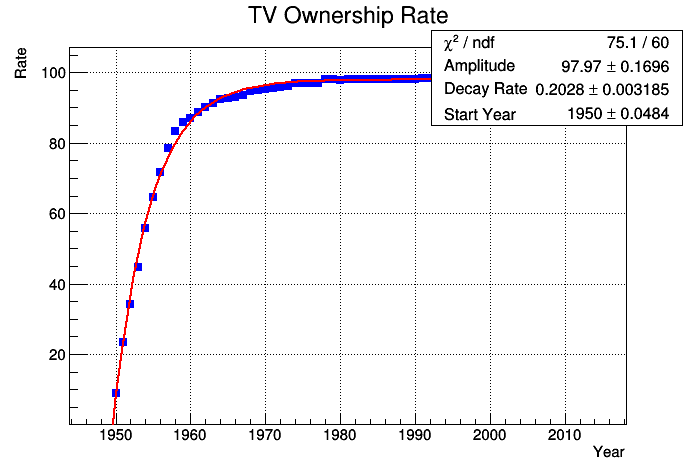

In [8]:
c1.cd()
gr.Draw("AP")
c1.Draw()

In [9]:
yyp = array('d')
xxp = array('d')
fitderiv = array('d')

for i in range(1,npoints-1):
    xxp.append(xx[i])
    yyp.append((yy[i+1]-yy[i-1])/2.0)
    fitderiv.append(derivativefunction_python(xx[i],parfit))
    
gr2 = TGraph(npoints-2,xxp,yyp)
gr2.SetMarkerColor(4)
gr2.SetMarkerStyle(21)
gr2.SetTitle("First Derivative of TV Ownership Rate")
gr2.GetXaxis().SetTitle("Year")
gr2.GetYaxis().SetTitle("First Derivative of Rate")
gr4 = TGraph(npoints-2,xxp,fitderiv)
gr4.SetLineColor(2)

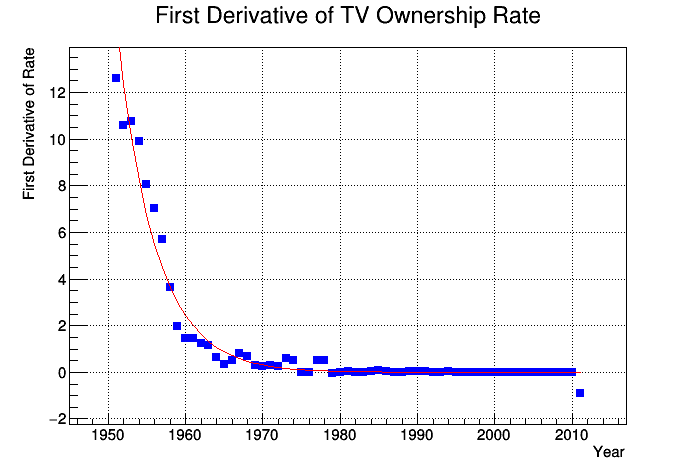

In [10]:
c2.cd()
gr2.Draw("AP")
gr4.Draw("LS")
c2.Draw()


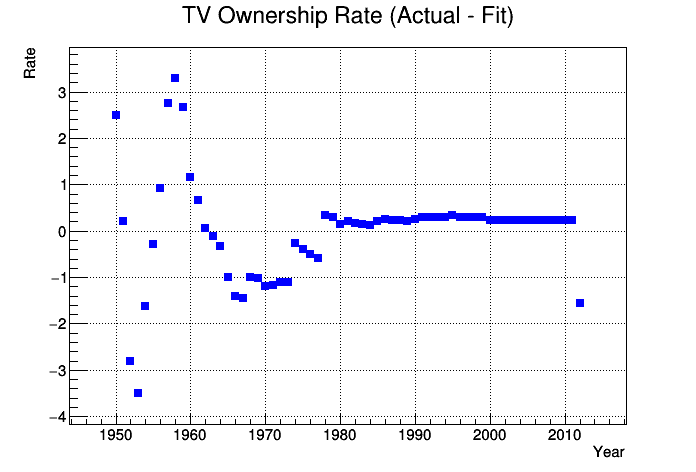

In [11]:
diff = array('d')
for i in range(0,npoints):
    yfit = fitfunction_python(xx[i],parfit)
    diff.append(yy[i]-yfit)

gr3 = TGraph(npoints,xx,diff)
gr3.SetMarkerColor(4)
gr3.SetMarkerStyle(21)
gr3.SetTitle("TV Ownership Rate (Actual - Fit)")
gr3.GetXaxis().SetTitle("Year")
gr3.GetYaxis().SetTitle("Rate")

c2.cd()
gr3.Draw("AP")
c2.Draw()